In [3]:
!pip install opencv-python

In [5]:
!pip install librosa

   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 9.7 MB/s eta 0:00:00


In [9]:
!pip install tensorflow

In [10]:
import os
import json
import cv2
import librosa
import IPython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
from warnings import filterwarnings

filterwarnings(action='ignore')

In [15]:
import os

# Define dataset path
dataset_path = r"C:\Users\Deliciaa Kumar\OneDrive\Desktop\Bird\sample_audio\Voice of Birds\Voice of Birds"

# Initialize lists
audio_files = []
labels = []

# Iterate through each bird species folder
for bird_species in os.listdir(dataset_path):
    species_path = os.path.join(dataset_path, bird_species)

    # Ensure it's a directory (not a file)
    if os.path.isdir(species_path):
        # List audio files inside species folder
        for file in os.listdir(species_path):
            if file.lower().endswith('.mp3'):  # Process only MP3 files
                file_path = os.path.join(species_path, file)
                audio_files.append(file_path)  # Store file path
                labels.append(bird_species)  # Use folder name as label

# Print dataset summary
print(f"Total audio files found: {len(audio_files)}")
print(f"Total unique bird species: {len(set(labels))}")
print("Sample file paths:", audio_files[:5])
print("Sample labels:", labels[:5])


Total audio files found: 2161
Total unique bird species: 114
Sample file paths: ['C:\\Users\\Deliciaa Kumar\\OneDrive\\Desktop\\Bird\\sample_audio\\Voice of Birds\\Voice of Birds\\Andean Guan_sound\\Andean Guan10.mp3', 'C:\\Users\\Deliciaa Kumar\\OneDrive\\Desktop\\Bird\\sample_audio\\Voice of Birds\\Voice of Birds\\Andean Guan_sound\\Andean Guan11.mp3', 'C:\\Users\\Deliciaa Kumar\\OneDrive\\Desktop\\Bird\\sample_audio\\Voice of Birds\\Voice of Birds\\Andean Guan_sound\\Andean Guan12.mp3', 'C:\\Users\\Deliciaa Kumar\\OneDrive\\Desktop\\Bird\\sample_audio\\Voice of Birds\\Voice of Birds\\Andean Guan_sound\\Andean Guan13.mp3', 'C:\\Users\\Deliciaa Kumar\\OneDrive\\Desktop\\Bird\\sample_audio\\Voice of Birds\\Voice of Birds\\Andean Guan_sound\\Andean Guan14.mp3']
Sample labels: ['Andean Guan_sound', 'Andean Guan_sound', 'Andean Guan_sound', 'Andean Guan_sound', 'Andean Guan_sound']


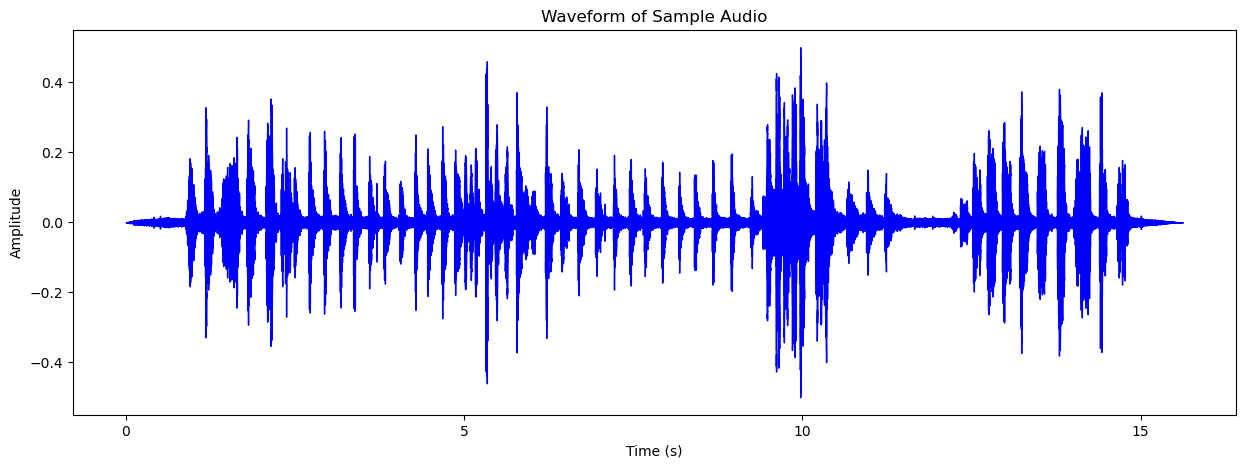

Playing: C:\Users\Deliciaa Kumar\OneDrive\Desktop\Bird\sample_audio\Voice of Birds\Voice of Birds\Andean Guan_sound\Andean Guan12.mp3


In [20]:
import IPython.display as ipd
# Define sample audio file path (update if needed)
sample_audio_path = r"C:\Users\Deliciaa Kumar\OneDrive\Desktop\Bird\sample_audio\Voice of Birds\Voice of Birds\Andean Guan_sound\Andean Guan12.mp3"

# Load the audio file
audio_data, sample_rate = librosa.load(sample_audio_path, sr=None)

# Plot the waveform
plt.figure(figsize=(15, 5))
librosa.display.waveshow(audio_data, sr=sample_rate, color="blue")
plt.title("Waveform of Sample Audio")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Play the audio
print(f"Playing: {sample_audio_path}")
ipd.Audio(audio_data, rate=sample_rate)

In [21]:
audio_data, sample_rate = librosa.load(sample_audio_path, sr=None)  # Keeps original sample rate

MFCCs Shape: (40, 1346)
Mean of MFCCs (per feature): [-3.4137537e+02  4.4649761e+01 -7.7643135e+01 -4.4105427e+01
 -3.7122349e+01 -8.7521464e-01 -9.2926925e-01  7.7504663e+00
 -8.1189423e+00 -4.4423771e+00 -2.8820708e+00  1.1483961e+01
  9.5357695e+00  1.0536748e+01  2.8761339e+00  1.9728562e+00
  2.0285430e+00  7.8648558e+00  2.8089576e+00  6.2483044e+00
  6.3135290e+00  5.3672261e+00  5.0416058e-01  3.7155273e+00
  3.5966623e+00  6.4996734e+00  2.9646101e+00  3.2797372e+00
  1.3268852e+00  3.8398478e+00 -5.4161447e-01  1.6051887e+00
 -4.1061550e-01  3.1305945e+00 -4.0907490e-01  2.2154832e+00
 -1.7746107e-01  2.0386829e+00 -1.2445354e+00  1.0805767e+00]


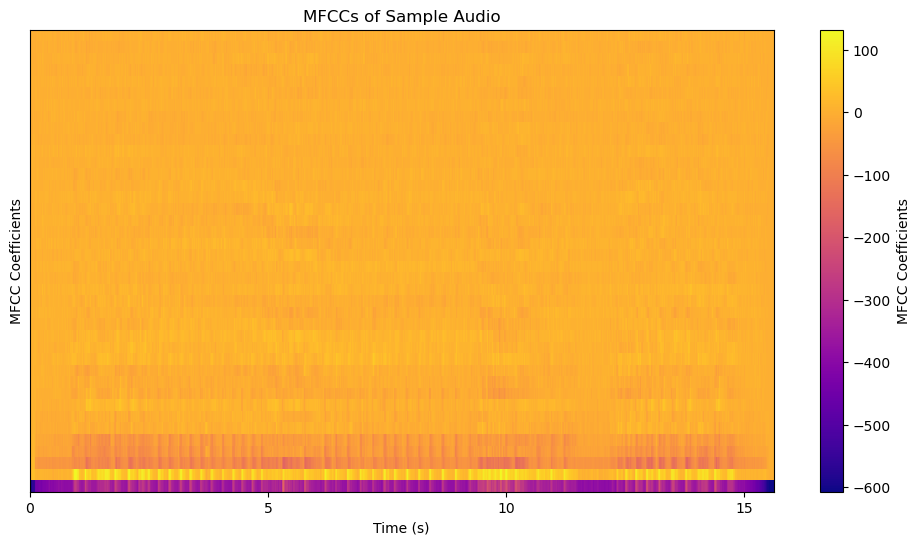

In [26]:
# Step 1: Compute MFCC Features
mfccs_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)

# Step 2: Print Shape and Mean Values (optional)
print("MFCCs Shape:", mfccs_features.shape)
print("Mean of MFCCs (per feature):", np.mean(mfccs_features, axis=1))

# Step 3: Plot MFCC Graph
plt.figure(figsize=(12, 6))
librosa.display.specshow(mfccs_features, sr=sample_rate, x_axis="time", cmap="plasma")  # You can change cmap
plt.colorbar(label="MFCC Coefficients")
plt.title("MFCCs of Sample Audio")
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.show()

In [32]:
import os
import librosa
from tqdm import tqdm

# Corrected Audio Directory Path for Windows
directory = r"C:\Users\Deliciaa Kumar\OneDrive\Desktop\Bird\sample_audio\Voice of Birds\Voice of Birds"

# Check if directory exists
if not os.path.exists(directory):
    print(f"Error: Directory '{directory}' does not exist!")
else:
    print("Directory found. Processing...")

    extracted_features = []

    # Count the total number of files
    total_files = sum(len(files) for _, _, files in os.walk(directory))

    # Initialize tqdm with the total number of files
    with tqdm(total=total_files, desc='Processing files') as pbar:
        for target_class in os.listdir(directory):  # List of All Target Folder Names in Directory
            target_class_path = os.path.join(directory, target_class)

            if not os.path.isdir(target_class_path):  # Ensure it's a directory
                continue

            for audio_file in os.listdir(target_class_path):  # List of All Audio Files in Target Folder
                audio_path = os.path.join(target_class_path, audio_file)  # Make Audio File Path
                
                try:
                    # Check if file is an MP3 or unsupported format
                    if not audio_file.lower().endswith(('.wav', '.mp3')):
                        print(f"Skipping unsupported file: {audio_file}")
                        continue
                    
                    # Test loading the file
                    y, sr = librosa.load(audio_path, sr=None)
                    
                    # Extract Features
                    features = audio_to_tensors(audio_path)
                    extracted_features.append([features, target_class])  # Store Features & Label
                
                except Exception as e:
                    print(f"❌ Error processing {audio_path}: {e}")

                pbar.update(1)  # Update Progress Bar


Directory found. Processing...


Processing files:  32%|███▏      | 684/2161 [01:56<02:22, 10.36it/s]

❌ Error processing C:\Users\Deliciaa Kumar\OneDrive\Desktop\Bird\sample_audio\Voice of Birds\Voice of Birds\Darwins Nothura_sound\Darwins Nothura21.mp3: 


Processing files:  79%|███████▊  | 1701/2161 [04:21<01:14,  6.14it/s]

❌ Error processing C:\Users\Deliciaa Kumar\OneDrive\Desktop\Bird\sample_audio\Voice of Birds\Voice of Birds\Southern Cassowary_sound\Southern Cassowary2.mp3: 


Processing files:  83%|████████▎ | 1783/2161 [04:33<00:22, 16.78it/s]

❌ Error processing C:\Users\Deliciaa Kumar\OneDrive\Desktop\Bird\sample_audio\Voice of Birds\Voice of Birds\Spotted Nothura_sound\Spotted Nothura2.mp3: 


Processing files: 100%|██████████| 2161/2161 [05:22<00:00,  6.69it/s]


In [33]:
extracted_features[0]

[array([-302.7308    ,   70.47813   ,   13.989463  ,   28.27586   ,
           9.768282  ,    7.4185357 ,    3.6636062 ,   12.622561  ,
           0.91524106,    3.15177   ,    4.532145  ,    6.7180853 ,
          -2.0768955 ,    5.5894322 ,    3.097847  ,    1.879621  ,
          -0.49635005,    6.4944406 ,    2.0897272 ,    4.146482  ,
           2.351528  ,    7.5341434 ,    0.6378773 ,    5.842799  ,
           4.5193014 ,    5.587803  ,    1.6145756 ,    6.687456  ,
           2.103584  ,    4.21776   ,    2.5508912 ,    4.6314435 ,
           0.40562946,    4.0922813 ,    1.5406471 ,    3.7211802 ,
           0.51732594,    3.6272905 ,    0.56133217,    3.100785  ],
       dtype=float32),
 'Andean Guan_sound']

In [34]:
# Creating DataFrame from Extracted Features with Class Labels

features_df = pd.DataFrame(extracted_features, columns=['features', 'class'])
features_df

,features,class
0,"[-302.7308, 70.47813, 13.989463, 28.27586, 9.7...",Andean Guan_sound
1,"[-288.51892, 73.875404, -64.23192, -20.869184,...",Andean Guan_sound
2,"[-309.88, 10.40182, -90.29049, -44.553432, -18...",Andean Guan_sound
3,"[-149.14818, 66.39308, -56.11454, -2.8597841, ...",Andean Guan_sound
4,"[-204.62337, 86.42296, -38.221367, -8.752257, ...",Andean Guan_sound
...,...,...
2153,"[-171.642, 93.286835, -53.85223, -13.932725, -...",Yellow-legged Tinamou_sound
2154,"[-171.642, 93.286835, -53.85223, -13.932725, -...",Yellow-legged Tinamou_sound
2155,"[-273.93494, -0.48611638, -53.2027, -29.0412, ...",Yellow-legged Tinamou_sound
2156,"[-273.93494, -0.48611638, -53.2027, -29.0412, ...",Yellow-legged Tinamou_sound


In [35]:

# Encoding Class Labels using LabelEncoder

target_encoding = LabelEncoder().fit_transform(features_df['class'])
target_encoding

array([  0,   0,   0, ..., 113, 113, 113])

In [36]:

# Adding Encoded Class Labels Column to DataFrame

features_df['target'] = target_encoding.tolist()
features_df
     

,features,class,target
0,"[-302.7308, 70.47813, 13.989463, 28.27586, 9.7...",Andean Guan_sound,0
1,"[-288.51892, 73.875404, -64.23192, -20.869184,...",Andean Guan_sound,0
2,"[-309.88, 10.40182, -90.29049, -44.553432, -18...",Andean Guan_sound,0
3,"[-149.14818, 66.39308, -56.11454, -2.8597841, ...",Andean Guan_sound,0
4,"[-204.62337, 86.42296, -38.221367, -8.752257, ...",Andean Guan_sound,0
...,...,...,...
2153,"[-171.642, 93.286835, -53.85223, -13.932725, -...",Yellow-legged Tinamou_sound,113
2154,"[-171.642, 93.286835, -53.85223, -13.932725, -...",Yellow-legged Tinamou_sound,113
2155,"[-273.93494, -0.48611638, -53.2027, -29.0412, ...",Yellow-legged Tinamou_sound,113
2156,"[-273.93494, -0.48611638, -53.2027, -29.0412, ...",Yellow-legged Tinamou_sound,113


In [37]:
# Creating a Dictionary based on Class and Target columns for Future Prediction

prediction_dict = features_df.set_index('target')['class'].to_dict()
prediction_dict
     

{0: 'Andean Guan_sound',
 1: 'Andean Tinamou_sound',
 2: 'Australian Brushturkey_sound',
 3: 'Band-tailed Guan_sound',
 4: 'Barred Tinamou_sound',
 5: 'Bartletts Tinamou_sound',
 6: 'Baudo Guan_sound',
 7: 'Bearded Guan_sound',
 8: 'Berlepschs Tinamou_sound',
 9: 'Biak Scrubfowl_sound',
 10: 'Black Tinamou_sound',
 11: 'Black-billed Brushturkey_sound',
 12: 'Black-capped Tinamou_sound',
 13: 'Black-fronted Piping Guan_sound',
 14: 'Blue-throated Piping Guan_sound',
 15: 'Brazilian Tinamou_sound',
 16: 'Brown Tinamou_sound',
 17: 'Brushland Tinamou_sound',
 18: 'Buff-browed Chachalaca_sound',
 19: 'Cauca Guan_sound',
 20: 'Chaco Chachalaca_sound',
 21: 'Chestnut-bellied Guan_sound',
 22: 'Chestnut-headed Chachalaca_sound',
 23: 'Chestnut-winged Chachalaca_sound',
 24: 'Chilean Tinamou_sound',
 25: 'Choco Tinamou_sound',
 26: 'Cinereous Tinamou_sound',
 27: 'Collared Brushturkey_sound',
 28: 'Colombian Chachalaca_sound',
 29: 'Common Ostrich_sound',
 30: 'Crested Guan_sound',
 31: 'Curve

In [40]:
import json

# Define the correct file path
file_path = r"C:\Users\Deliciaa Kumar\OneDrive\Desktop\Bird\sample_audio\prediction.json"

# Read the JSON file
with open(file_path, mode='r') as f:
    prediction_dict = json.load(f)

# Display the dictionary
prediction_dict


{'0': 'Andean Guan_sound',
 '1': 'Andean Tinamou_sound',
 '2': 'Australian Brushturkey_sound',
 '3': 'Band-tailed Guan_sound',
 '4': 'Barred Tinamou_sound',
 '5': 'Bartletts Tinamou_sound',
 '6': 'Baudo Guan_sound',
 '7': 'Bearded Guan_sound',
 '8': 'Berlepschs Tinamou_sound',
 '9': 'Biak Scrubfowl_sound',
 '10': 'Black Tinamou_sound',
 '11': 'Black-billed Brushturkey_sound',
 '12': 'Black-capped Tinamou_sound',
 '13': 'Black-fronted Piping Guan_sound',
 '14': 'Blue-throated Piping Guan_sound',
 '15': 'Brazilian Tinamou_sound',
 '16': 'Brown Tinamou_sound',
 '17': 'Brushland Tinamou_sound',
 '18': 'Buff-browed Chachalaca_sound',
 '19': 'Cauca Guan_sound',
 '20': 'Chaco Chachalaca_sound',
 '21': 'Chestnut-bellied Guan_sound',
 '22': 'Chestnut-headed Chachalaca_sound',
 '23': 'Chestnut-winged Chachalaca_sound',
 '24': 'Chilean Tinamou_sound',
 '25': 'Choco Tinamou_sound',
 '26': 'Cinereous Tinamou_sound',
 '27': 'Collared Brushturkey_sound',
 '28': 'Colombian Chachalaca_sound',
 '29': 'C

In [41]:

# Converting Features into List
features = features_df['features'].tolist()
features

[array([-302.7308    ,   70.47813   ,   13.989463  ,   28.27586   ,
           9.768282  ,    7.4185357 ,    3.6636062 ,   12.622561  ,
           0.91524106,    3.15177   ,    4.532145  ,    6.7180853 ,
          -2.0768955 ,    5.5894322 ,    3.097847  ,    1.879621  ,
          -0.49635005,    6.4944406 ,    2.0897272 ,    4.146482  ,
           2.351528  ,    7.5341434 ,    0.6378773 ,    5.842799  ,
           4.5193014 ,    5.587803  ,    1.6145756 ,    6.687456  ,
           2.103584  ,    4.21776   ,    2.5508912 ,    4.6314435 ,
           0.40562946,    4.0922813 ,    1.5406471 ,    3.7211802 ,
           0.51732594,    3.6272905 ,    0.56133217,    3.100785  ],
       dtype=float32),
 array([-2.8851892e+02,  7.3875404e+01, -6.4231918e+01, -2.0869184e+01,
        -8.9157696e+00,  5.8880258e+00,  5.2031320e-01, -4.9954057e+00,
        -9.6936207e+00,  2.7154505e+00, -8.0318183e-01,  9.8982897e+00,
         3.9733297e-01, -2.8607423e+00, -3.3241615e+00,  1.4481857e-01,
        

In [42]:
# Converting Targets into Lists
target = features_df['target'].tolist()
print(target)
     

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 1

In [43]:
# Converting Features and Targets to TensorFlow Tensors
features_tensor = tf.convert_to_tensor(features)
target_tensor = tf.convert_to_tensor(target)
     

In [44]:
features_tensor
     

<tf.Tensor: shape=(2158, 40), dtype=float32, numpy=
array([[-3.0273080e+02,  7.0478127e+01,  1.3989463e+01, ...,
         3.6272905e+00,  5.6133217e-01,  3.1007850e+00],
       [-2.8851892e+02,  7.3875404e+01, -6.4231918e+01, ...,
         1.4791442e+00, -1.4696556e+00,  2.0787077e+00],
       [-3.0988000e+02,  1.0401820e+01, -9.0290489e+01, ...,
        -1.6754001e-01, -1.6882226e+00,  1.8219033e+00],
       ...,
       [-2.7393494e+02, -4.8611638e-01, -5.3202702e+01, ...,
         2.5225978e+00,  7.4212205e-01,  4.8195281e+00],
       [-2.7393494e+02, -4.8611638e-01, -5.3202702e+01, ...,
         2.5225978e+00,  7.4212205e-01,  4.8195281e+00],
       [-2.7393494e+02, -4.8611638e-01, -5.3202702e+01, ...,
         2.5225978e+00,  7.4212205e-01,  4.8195281e+00]], dtype=float32)>

In [45]:
target_tensor
     

<tf.Tensor: shape=(2158,), dtype=int32, numpy=array([  0,   0,   0, ..., 113, 113, 113])>

In [46]:

# Creating TensorFlow Dataset from Tensors
dataset = tf.data.Dataset.from_tensor_slices((features_tensor, target_tensor))
dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(40,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [47]:

# Split the dataset into batches
batch_size = 32
dataset = dataset.batch(batch_size)
dataset
     

<_BatchDataset element_spec=(TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [48]:
# Length of Batched Potato Dataset
len(dataset)

68

In [49]:
# Maximum Number of Images Count
68*32
     

2176

In [50]:
# No of images in Last Badge
2176-2161

15

In [51]:
# Define a Function process to Split Dataset into Training(80%), Validation(10%) and Testing(10%) Sets

def train_validation_test_split(dataset, train_size=0.8, validation_size=0.1, test_size=0.1, shuffle=True, shuffle_size=10000):

    dataset_batch_count = len(dataset)                                                  # Batch Images dataset Length is 68
    train_batch_count = int(dataset_batch_count * train_size)                           # int(68*0.8) ---> 54 Batches are Training
    validation_test_batch_count = int(dataset_batch_count * validation_size)            # int(68*0.1) ---> 6 Batches are validation & Remaining Testing

    if shuffle:
        dataset = dataset.shuffle(buffer_size=shuffle_size)                             # Suffling the Dataset help to Model Understand the Data Well

    train_ds = dataset.take(train_batch_count)                                          # First 54 Batches are Training_Dataset
    validation_ds = dataset.skip(train_batch_count).take(validation_test_batch_count)   # Remaining 14 Batches ---> Next 6 Batch are Validation_Dataset
    test_ds = dataset.skip(train_batch_count).skip(validation_test_batch_count)         # Pending 8 Batches are Testing

    return train_ds, validation_ds, test_ds

In [52]:
# Apply the Function in Potato Dataset
train_ds, validation_ds, test_ds = train_validation_test_split(dataset)
len(train_ds), len(validation_ds), len(test_ds)

(54, 6, 8)

In [57]:
for audio_batch, label_batch in train_ds.take(1):
    print("Audio Batch Shape:", audio_batch.numpy().shape)  # (batch_size, time_steps, features) ?

    mfcc_features = audio_batch.numpy()[0]  # Extract single sample
    print("MFCC Shape:", mfcc_features.shape)  # Should be (time_steps, n_mfcc)

    # Convert MFCC back to waveform (Only if shape is valid)
    if len(mfcc_features.shape) == 2:
        audio = librosa.feature.inverse.mfcc_to_audio(mfcc_features)

        # Plot the reconstructed audio waveform
        plt.figure(figsize=(10, 4))
        librosa.display.waveshow(audio)
        plt.show()
    else:
        print("Invalid MFCC shape. Expected 2D, got:", mfcc_features.shape)


Audio Batch Shape: (32, 40)
MFCC Shape: (40,)
Invalid MFCC shape. Expected 2D, got: (40,)


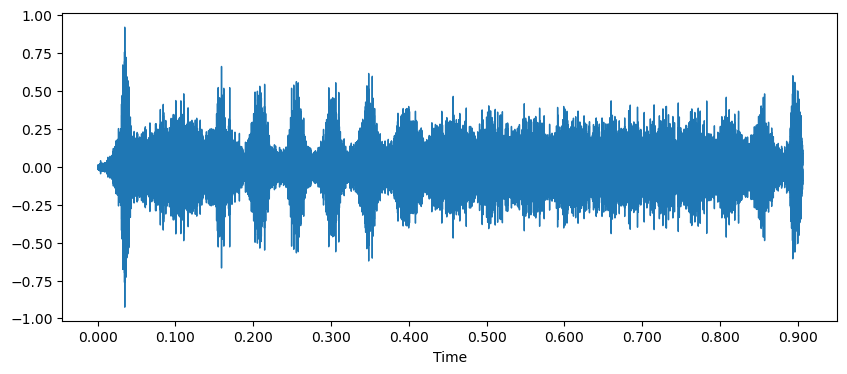

In [58]:
# Reshape MFCC to 2D (assuming 1 time step)
mfcc_features = mfcc_features.reshape(1, -1)  # Reshape to (1, 40)

# Now convert MFCC to audio
audio = librosa.feature.inverse.mfcc_to_audio(mfcc_features)

# Plot the reconstructed audio waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio)
plt.show()

In [59]:
# Overview of Training Dataset Structure and Specifications
train_ds

<_TakeDataset element_spec=(TensorSpec(shape=(None, 40), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [60]:
# Building an Optimized Data Pipeline for Enhanced Performance

# Training Dataset
train_ds = train_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

# Validation Dataset
validation_ds = validation_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

# Testing Dataset
test_ds = test_ds.cache().shuffle(buffer_size=1000).prefetch(tf.data.AUTOTUNE)

In [61]:
# Define the Parameters of Input_shape, Channel and Target

mfcc_features = 40    # Extracted features from Audio
channel = 1           # Mono Channel
target = 114          # Output Classes

input_shape = (mfcc_features, channel)
input_shape

(40, 1)

In [62]:
# Build a CNN Model Architecture

model = keras.Sequential([

            # Input Layer
            keras.layers.Input(shape=input_shape),

            # 1st Conv Layer
            keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # 2nd Conv Layer
            keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # 3rd Conv Layer
            keras.layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.MaxPool1D(pool_size=2, padding='same'),

            # Flatten and Convert into 1-Dimentional Vector
            keras.layers.Flatten(),

            # 1st Fully Connected Dense Layer
            keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=1e-2)),
            keras.layers.Dropout(rate=0.3),

            # 2nd Fully Connected Dense Layer
            keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=1e-2)),
            keras.layers.Dropout(rate=0.3),

            # Output Layer
            keras.layers.Dense(units=target, activation='softmax')
        ])

model

<Sequential name=sequential, built=True>

In [66]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 38, 128)        │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 38, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 19, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 17, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 17, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 9, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 7, 256)         │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 256)         │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 4, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 114)            │        58,482 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,144,434 (4.37 MB)

 Trainable params: 1,143,154 (4.36 MB)

 Non-trainable params: 1,280 (5.00 KB)

In [67]:
# Compiling the Model with Optimizer, Loss, and Metrics

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model

<Sequential name=sequential, built=True>

In [70]:

# Model Training with Training_Dataset and Evaluated with Validation_Dataset

history = model.fit(train_ds,
                    batch_size=batch_size,
                    epochs=700,
                    verbose=1,
                    validation_data = validation_ds)
history

Epoch 1/700
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9991 - loss: 0.6106 - val_accuracy: 0.9479 - val_loss: 1.3578
Epoch 2/700
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9980 - loss: 0.6107 - val_accuracy: 0.9062 - val_loss: 1.3950
Epoch 3/700
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9991 - loss: 0.6009 - val_accuracy: 0.9167 - val_loss: 1.3202
Epoch 4/700
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9987 - loss: 0.6006 - val_accuracy: 0.9115 - val_loss: 1.3525
Epoch 5/700
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9997 - loss: 0.6038 - val_accuracy: 0.9271 - val_loss: 1.3354
Epoch 6/700
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9998 - loss: 0.5918 - val_accuracy: 0.9323 - val_loss: 1.3456
Epoch 7/700
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9977 - loss: 0.5967 - val_accuracy: 0.8958 - val_loss: 1.3834
Epoch 8/700
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9994 - loss: 0.5923 - val_accuracy: 0.

In [71]:
# Evaluating Model Performance on Test Dataset
model.evaluate(test_ds)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3111 - loss: 6.0211


[5.688973426818848, 0.32421875]

In [73]:
# Accessing Training History Parameters
history.params

{'verbose': 1, 'epochs': 700, 'steps': 54}

In [74]:
# Accessing Keys of Training History
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [75]:
# Extracting Accuracy Metrics from Training History
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Extracting Loss Metrics from Training History
loss = history.history['loss']
val_loss = history.history['val_loss']

In [76]:
len(acc), len(val_acc), len(loss), len(val_loss)

(700, 700, 700, 700)

In [81]:
import tensorflow as tf
from tensorflow import keras

# Save the model
model.save('model.h5')  # Saves in the current directory

# Optional: Verify the file exists
import os
print("Model saved:", os.path.exists("model.h5"))

Model saved: True


In [82]:
model.save("model.keras")  # Save in the new Keras formaT

Text(0.5, 1.0, 'Training vs Validation Loss')

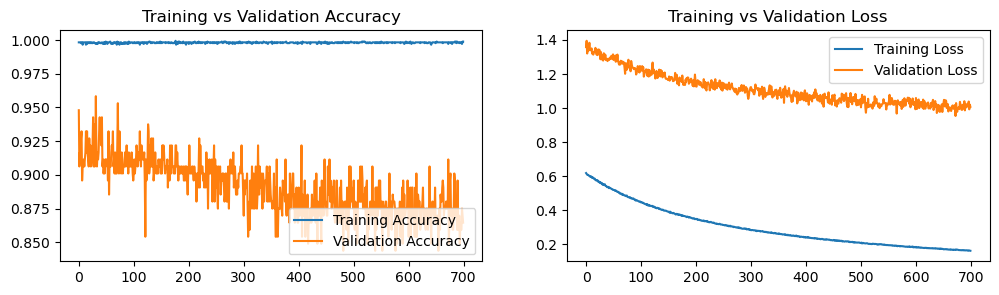

In [83]:
# Visualize the Acuuracy & Loss using Plots

plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

In [95]:
import os

folder_path = r"C:\Users\Deliciaa Kumar\OneDrive\Desktop\Bird"
print("Files in directory:", os.listdir(folder_path))


Files in directory: ['Inference_Images', 'sample_audio']


In [103]:
import json
import numpy as np
import tensorflow as tf
import librosa
import os

def prediction(audio_file):
    # Fix JSON path
    json_path = r"C:\Users\Deliciaa Kumar\OneDrive\Desktop\Bird\prediction.json"
    
    # Fix model path
    model_path = r"C:\Users\Deliciaa Kumar\OneDrive\Desktop\Bird\model.h5"
    
    # Check if files exist
    if not os.path.exists(json_path):
        print(f"Error: File not found at {json_path}")
        return
    
    if not os.path.exists(model_path):
        print(f"Error: Model file not found at {model_path}")
        return

    if not os.path.exists(audio_file):
        print(f"Error: Audio file not found at {audio_file}")
        return

    # Load the Prediction JSON File to Predict Target_Label
    with open(json_path, mode='r') as f:
        prediction_dict = json.load(f)

    # Extract the Audio Signal and Sample Rate from Input Audio
    audio, sample_rate = librosa.load(audio_file)

    # Extract the MFCC Features and Aggregate
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features = np.mean(mfccs_features, axis=1)

    # Reshape MFCC features to match the expected input shape for Conv1D
    mfccs_features = np.expand_dims(mfccs_features, axis=0)
    mfccs_features = np.expand_dims(mfccs_features, axis=2)

    # Convert into Tensors
    mfccs_tensors = tf.convert_to_tensor(mfccs_features, dtype=tf.float32)

    # Load the Model and Make Prediction
    model = tf.keras.models.load_model(model_path)
    prediction = model.predict(mfccs_tensors)

    # Find the Maximum Probability Value
    target_label = np.argmax(prediction)

    # Find the Target_Label Name using Prediction_dict
    predicted_class = prediction_dict.get(str(target_label), "Unknown")
    confidence = round(np.max(prediction) * 100, 2)

    print(f'Predicted Class : {predicted_class}')
    print(f'Confidence : {confidence}%')

In [105]:
prediction(r"C:\Users\Deliciaa Kumar\OneDrive\Desktop\Bird\sample_audio\Voice of Birds\Voice of Birds\Andean Guan_sound\Andean Guan2.mp3")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step
Predicted Class : Andean Guan_sound
Confidence : 83.22%


In [110]:
prediction(r"C:\Users\Deliciaa Kumar\OneDrive\Desktop\Bird\sample_audio\Voice of Birds\Voice of Birds\Band-tailed Guan_sound\Band-tailed Guan2.mp3")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step
Predicted Class : Band-tailed Guan_sound
Confidence : 31.26%
